In [1]:
from simulator_modules.Operators import HighVariability, LowVariability
from simulator_modules.Relations import LinkH2Metano, LinkMaxEnergyFuel, LinkGeneratedEnergy, LinkSimilarBehavior, LinkLongRecovery
from simulator_modules.TurbineSimulator import Graph, plot_nodes_history, plot_sum_history
import matplotlib.pyplot as plt

In [2]:
def plot_nodes_history_with_markers(nodes, step_range, constants, constant_names, mark_steps):
    plt.figure(figsize=(10, 5))
    title = ""
    for idx, node in enumerate(nodes):
        if step_range:
            start, end = step_range
            y = node.stack[start:end]
            x = list(range(start, end))
            plt.plot(x, y, label=node.name)
        else:
            y = node.stack
            x = list(range(len(y)))
            plt.plot(x, y, label=node.name)
        title += f"{node.name}, "
        if idx == 0:
            alert_label_added = False
            for step in mark_steps:
                label = "Alerts" if not alert_label_added else None
                if step_range:
                    if start <= step < end and (step - start) < len(y):
                        plt.plot(step, y[step - start], 'x', color='black', markersize=4, markeredgewidth=2, label=label)
                        alert_label_added = True
                else:
                    if step < len(y):
                        plt.plot(step, y[step], 'x', color='black', markersize=4, markeredgewidth=2, label=label)
                        alert_label_added = True
    if constants is not None:
        if step_range:
            start, end = step_range
            steps = end - start
            x = list(range(start, end))
        else:
            steps = len(nodes[0].stack) if nodes else 0
            x = list(range(steps))
        for idx, const in enumerate(constants):
            label = f"Constant {idx+1}" if constant_names is None else constant_names[idx]
            plt.plot(x, [const] * len(x), label=label, linestyle="--")
    plt.title(f"Value Stack History: {title.strip(', ')}")
    plt.xlabel("Steps")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

# Current version of the Simulator usage

Node H2: Metano, MaxEnergy, 
Node Metano: 
Node MaxEnergy: GeneratedEnergy, 
Node GeneratedEnergy: 


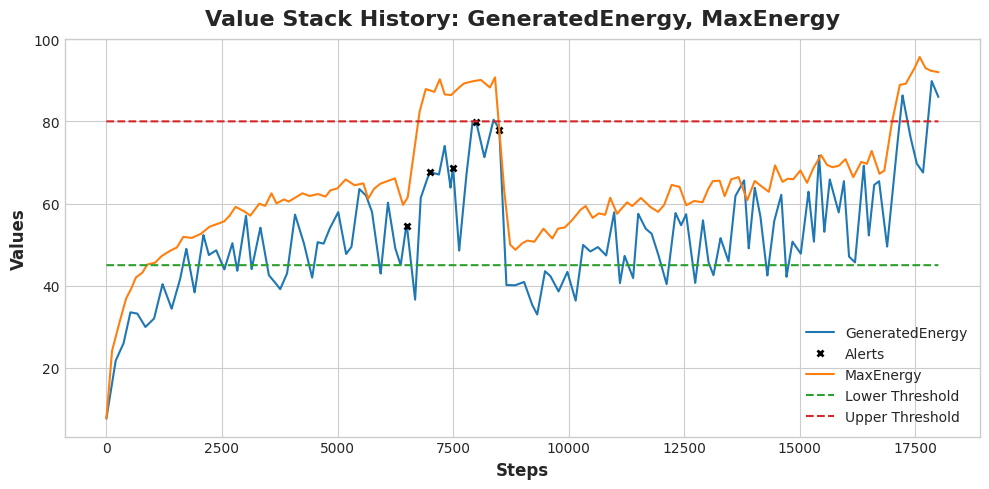

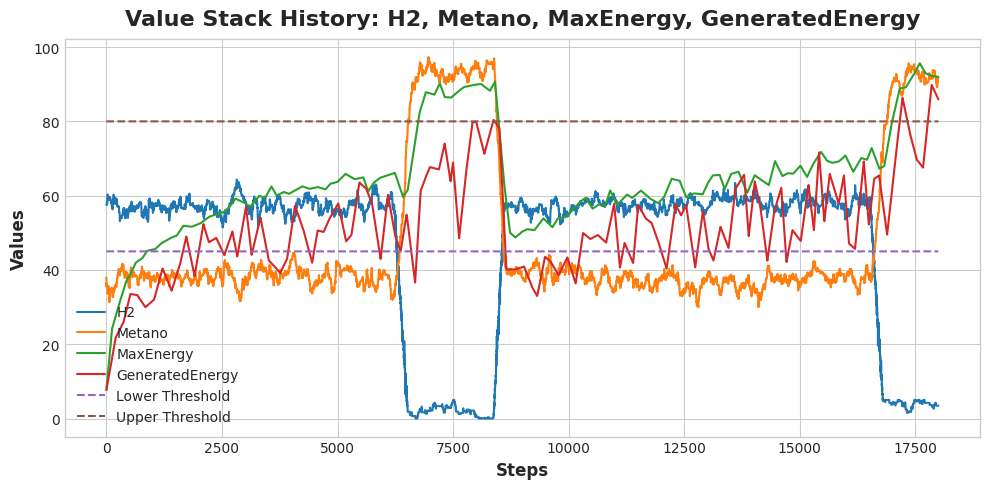

In [ ]:
def create_nodes_and_relations(prob=0.0001):
    # Create nodes
    H2 = HighVariability(lower_bound=30, upper_bound=70, typical_value=57.5, name="H2",
                         typical_bias=0.1, typical_bias_prob=0.1, theta=1.5, theta_prob=0.1,
                         deviate_prob=prob, deviate_duration_range=(180, 300),
                         recover_duration_range=(180, 300), deviate_bias_range=(-5, 5),
                         deviate_bias_prob=0.05, deviate_peak_value_range=(0, 5),
                         plat_duration_range=(1500, 2000), plat_prob_vary=0.05, plat_variation=1)
    Metano = HighVariability(lower_bound=30, upper_bound=70, typical_value=40, name="Metano",
                             typical_bias=0.1, typical_bias_prob=0.1, theta=1.5, theta_prob=0.1)
    MaxEnergy = LowVariability(lower_bound=0, upper_bound=100, typical_value=20, name="MaxEnergy",
                           theta=0.7, steps_range=(100, 200))
    GeneratedEnergy = LowVariability(lower_bound=0, upper_bound=100, typical_value=40, name="GeneratedEnergy",
                                     theta=0.7, steps_range=(100,200))
    # Create relations
    relations = {
        "relation1": LinkH2Metano(limit_lower_bound=75, limit_upper_bound=100,
                                  typical_lower_bound=93, typical_upper_bound=98),
        "relation2": LinkMaxEnergyFuel(),
        "relation3": LinkGeneratedEnergy(typical_bias_prob=0, typical_bias=0.2,
                                         theta_prob=0.7, theta_bias=0.8),
    }

    return H2, Metano, MaxEnergy, GeneratedEnergy, relations

def create_graph():
    H2, Metano, MaxEnergy, GeneratedEnergy, relations = create_nodes_and_relations()

    graph = Graph(random_seed=44, debug=True, n_unstable_steps=480)
    node1 = graph.add_node(H2)
    node2 = graph.add_node(Metano)
    node3 = graph.add_node(MaxEnergy)
    node4 = graph.add_node(GeneratedEnergy)
    graph.add_edge(root=node1, child=node2, strategy=relations["relation1"])
    graph.add_edge(root=node1, child=node3, strategy=relations["relation2"], other_influences=[node2])
    graph.add_edge(root=node3, child=node4, strategy=relations["relation3"])

    return graph, [node1, node2, node3, node4]

graph, nodes = create_graph()
node1, node2, node3, node4 = nodes

graph.display()
# graph.simulate(100000)

# Simulate with alerts between steps 6300 and 8500
for i in range(18000):
    if i >= 6300 and i <= 8500 and i % 500 == 0:
    # if i == 6300:
        alerts = True
    else:
        alerts = False
    other_information = {'alert': alerts}
    graph.simulate(steps=1, other_informations=other_information)

plot_nodes_history_with_markers(nodes=[node4,node3], step_range=None, constants=[45,80], constant_names=["Lower Threshold", "Upper Threshold"], mark_steps=[6500, 7000, 7500, 8000, 8500])
plot_nodes_history(nodes=[node1,node2,node3,node4], constants=[45,80], constant_names=["Lower Threshold", "Upper Threshold"])

# Previous version of the Simulator usage

Node H2: Metano, Enxofre, Etileno, N-Butano, Propileno, CO, Vazão, 
Node Metano: Etano, Propano, C5+, CO2, 
Node Enxofre: 
Node Etileno: 
Node N-Butano: 
Node Etano: 
Node Propano: 
Node C5+: 
Node CO2: 
Node Propileno: 
Node CO: 
Node Vazão: 


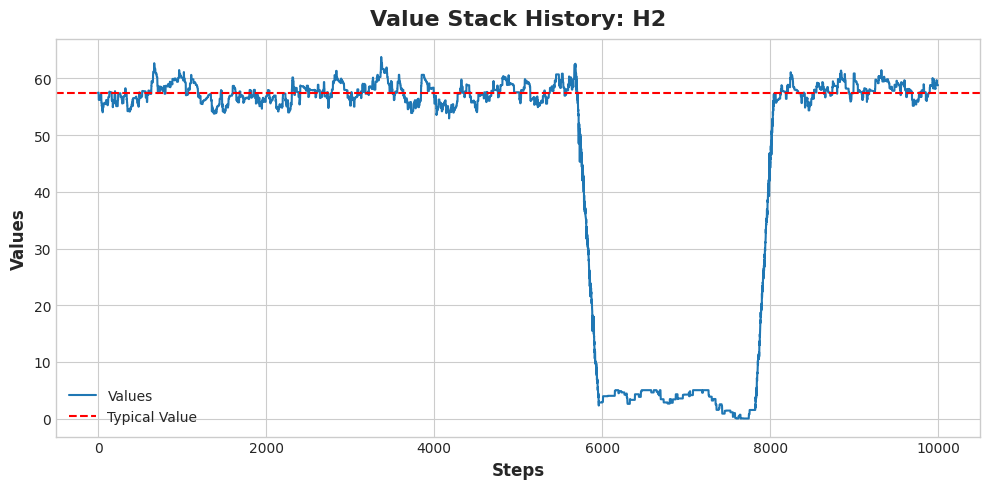

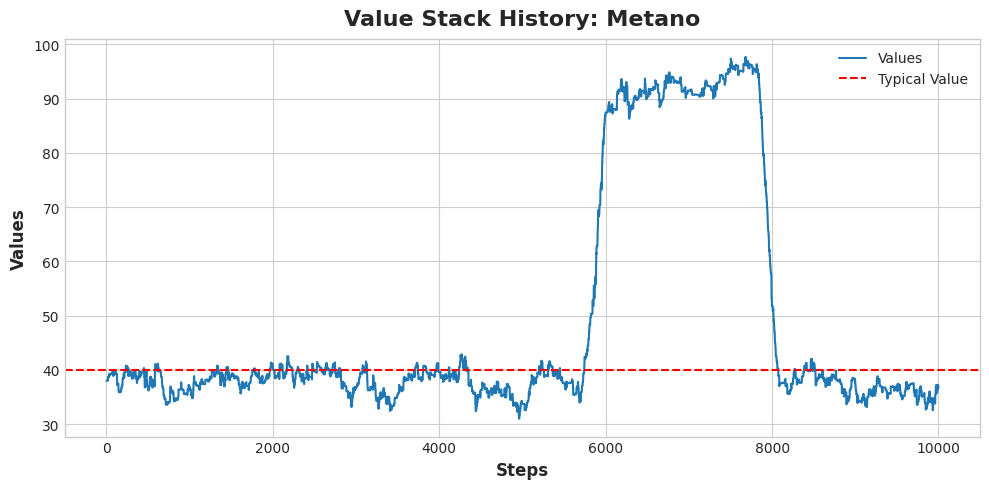

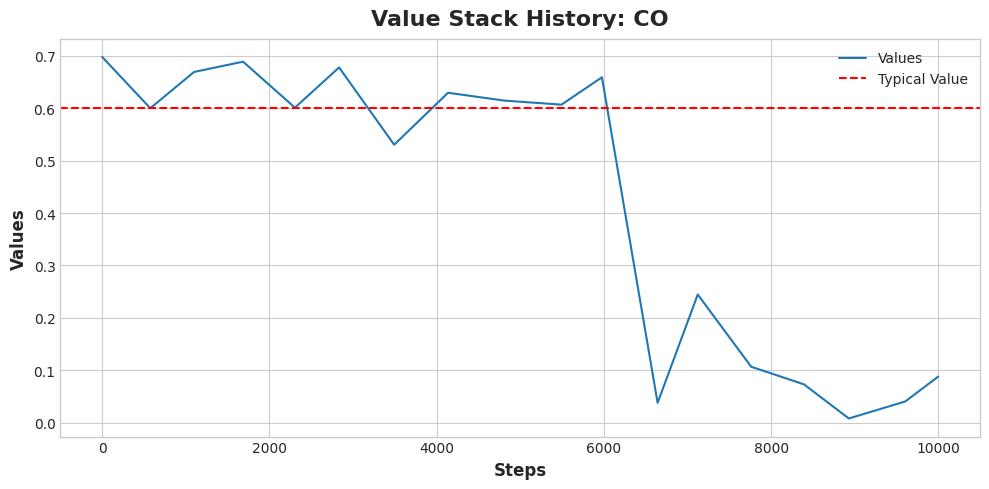

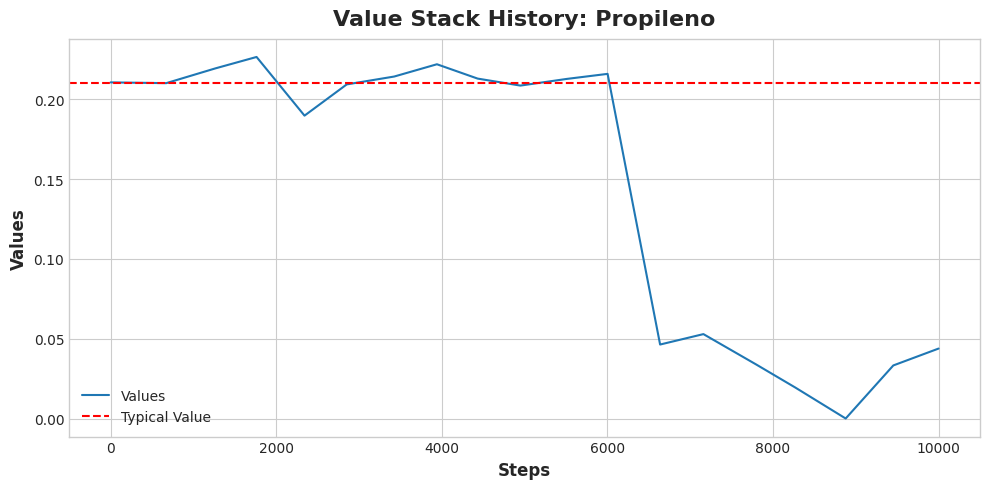

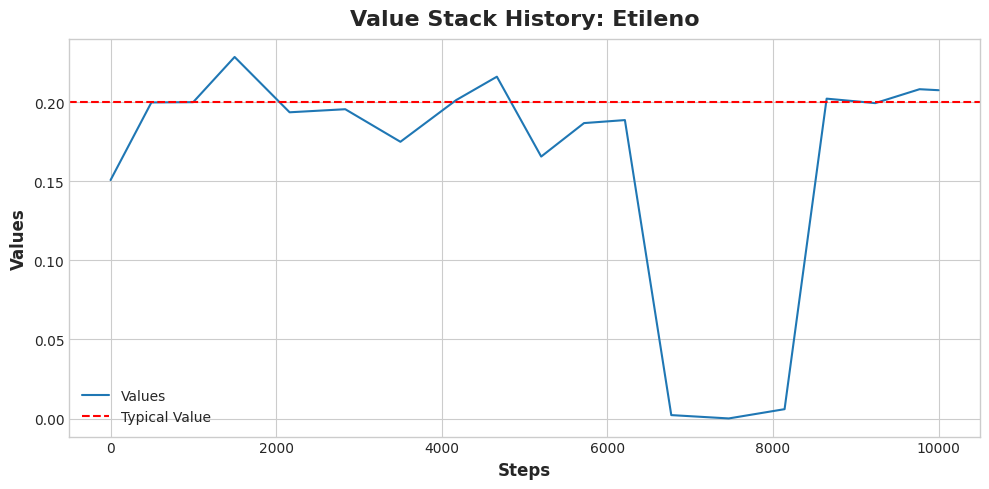

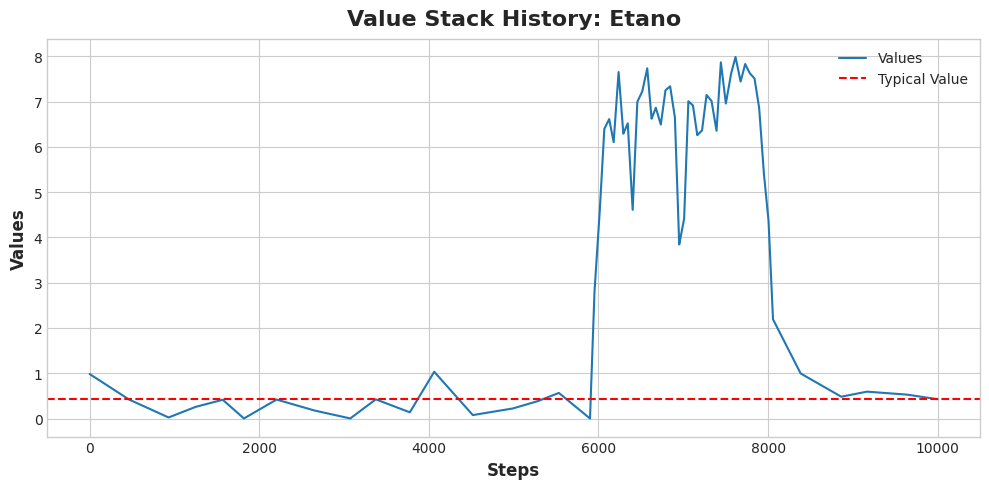

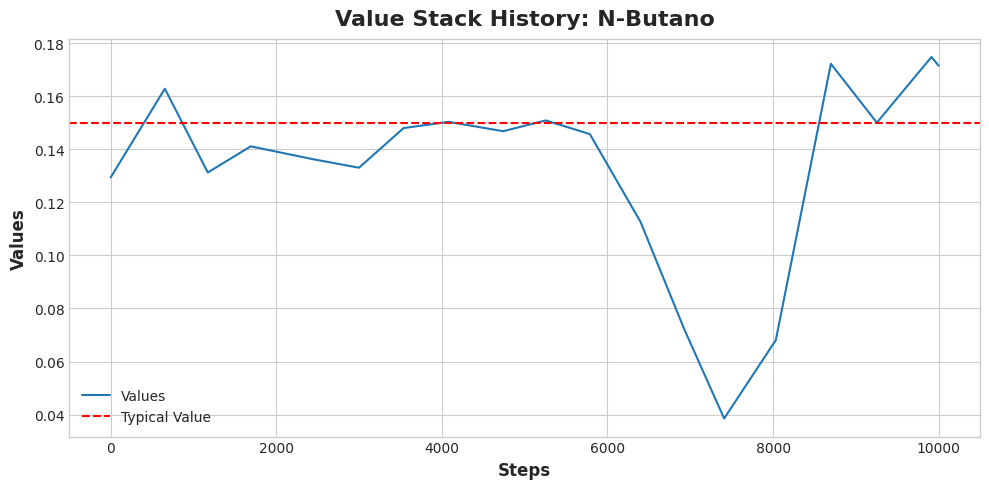

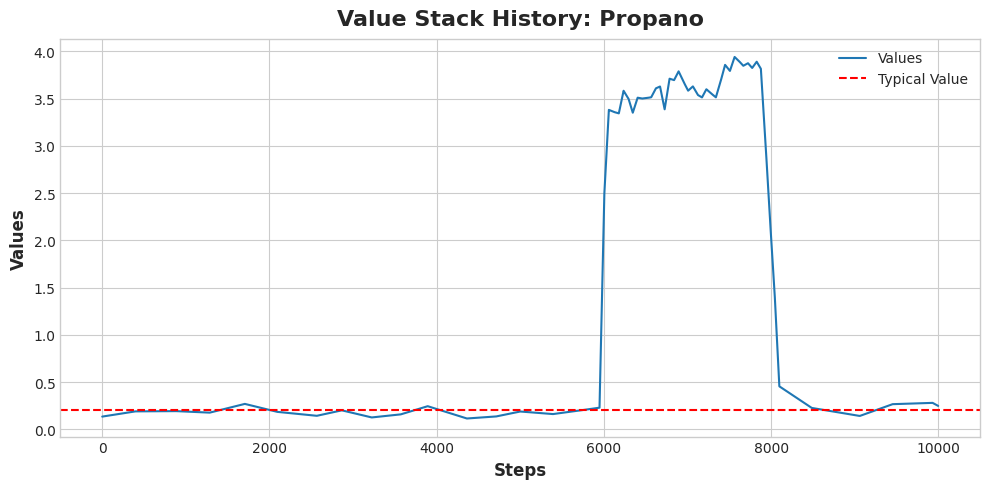

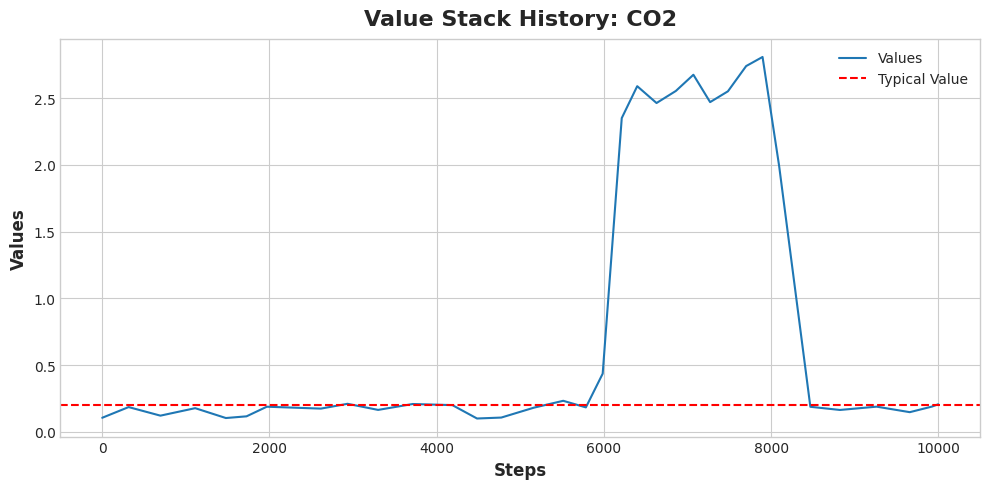

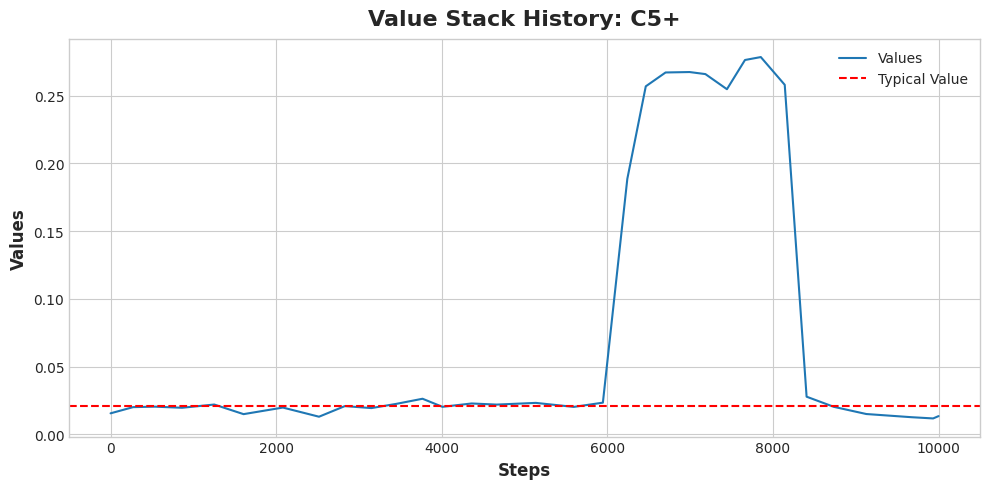

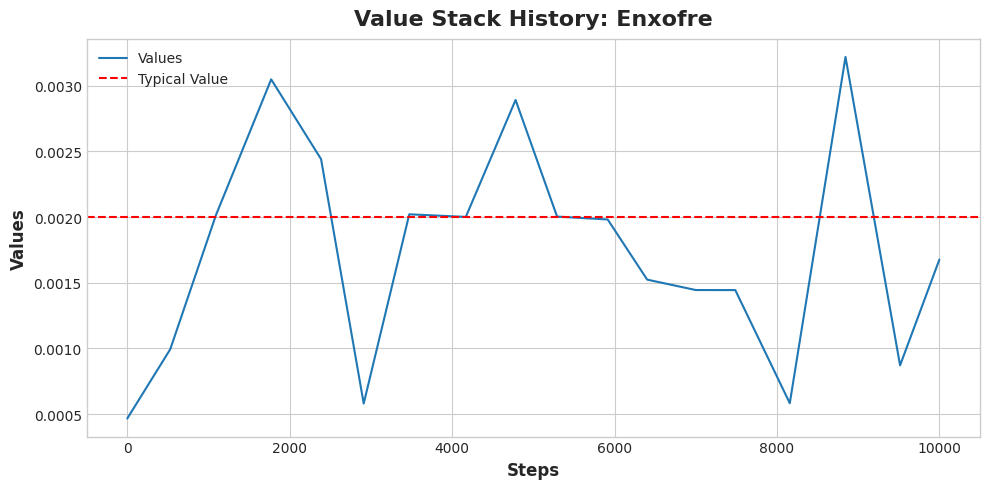

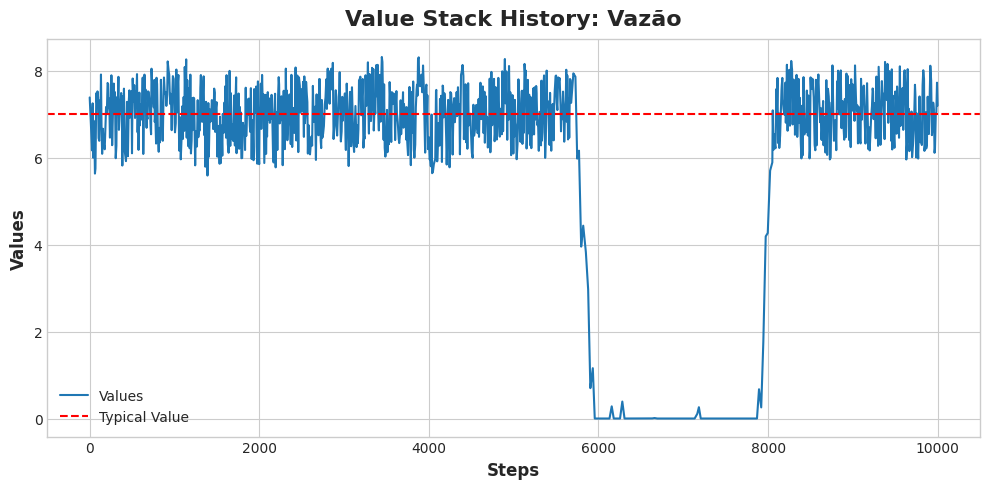

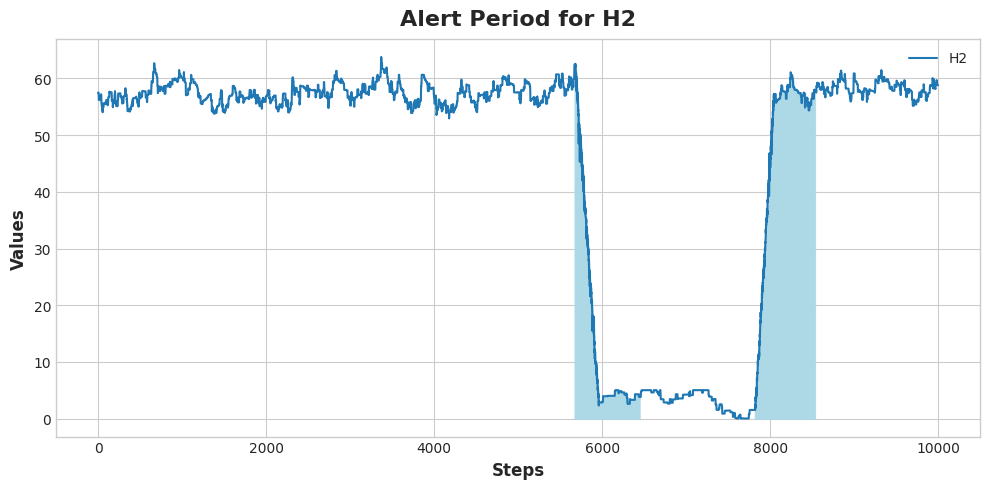

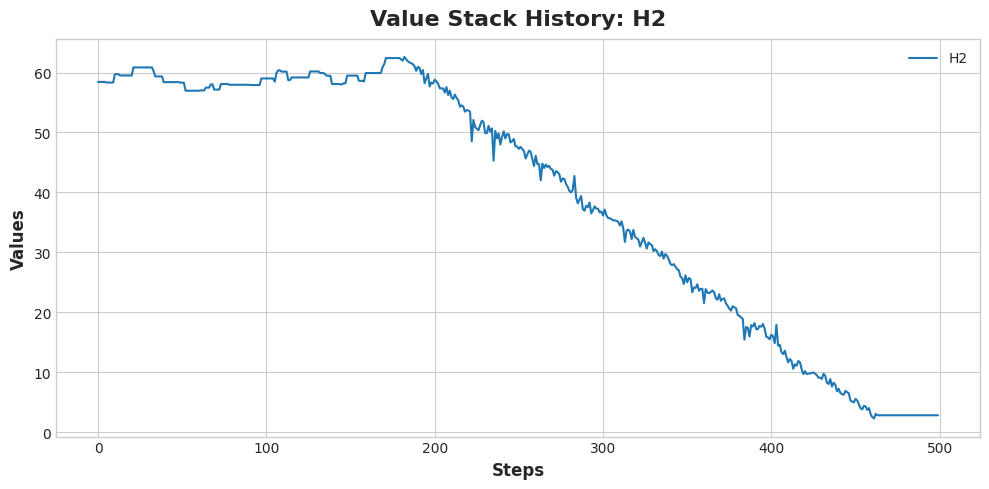

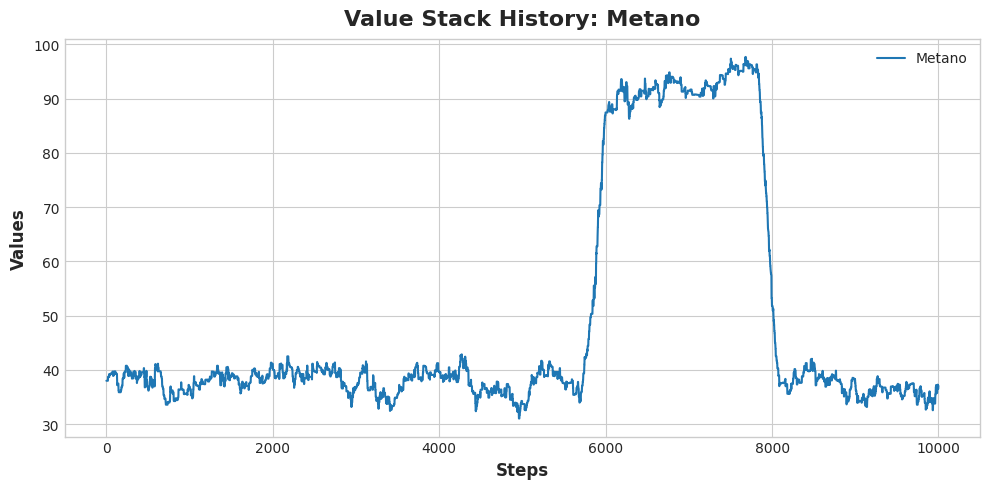

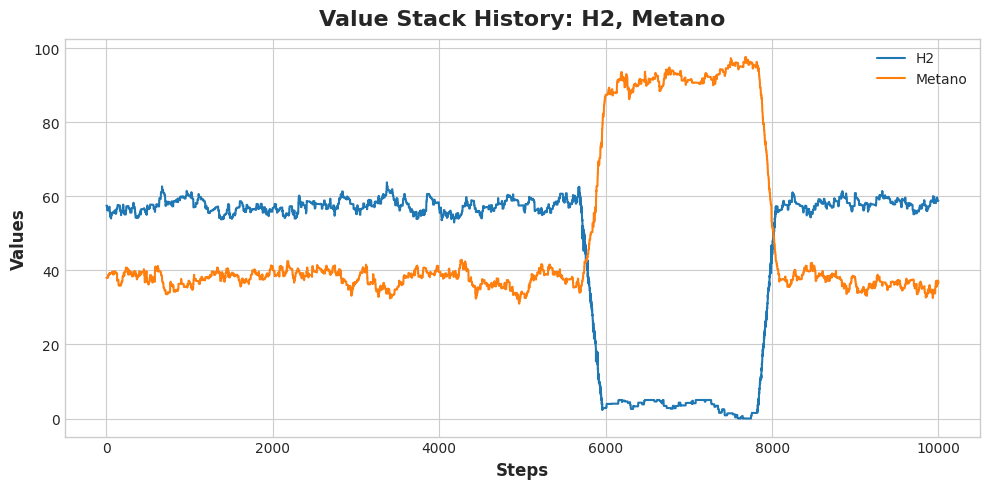

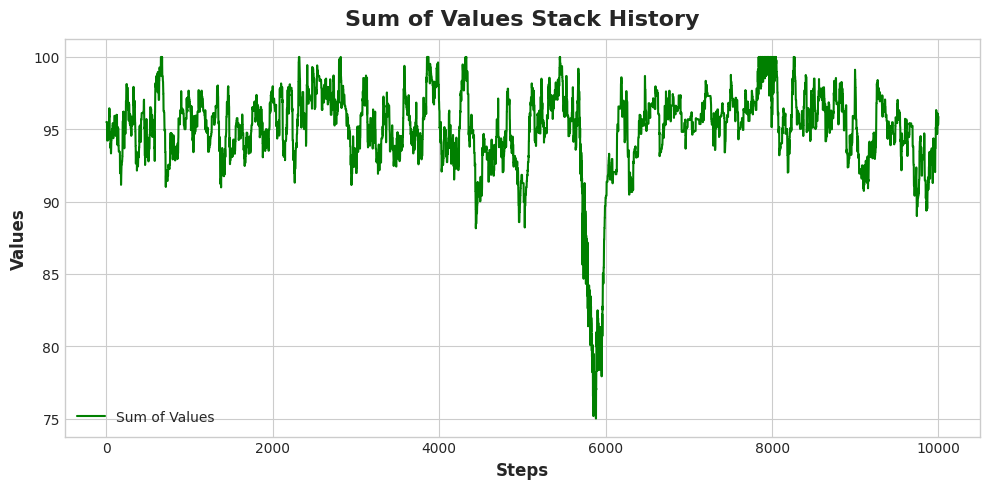

In [4]:
def create_nodes_and_relations(prob=0.0001):
    # Create nodes
    H2 = HighVariability(lower_bound=30, upper_bound=70, typical_value=57.5, name="H2",
                         typical_bias=0.1, typical_bias_prob=0.1, theta=1.5, theta_prob=0.1,
                         deviate_prob=prob, deviate_duration_range=(180, 300),
                         recover_duration_range=(180, 300), deviate_bias_range=(-5, 5),
                         deviate_bias_prob=0.05, deviate_peak_value_range=(0, 5),
                         plat_duration_range=(1500, 2000), plat_prob_vary=0.05, plat_variation=1)
    Metano = HighVariability(lower_bound=30, upper_bound=70, typical_value=40, name="Metano",
                             typical_bias=0.1, typical_bias_prob=0.1, theta=1.5, theta_prob=0.1)
    Enxofre = LowVariability(lower_bound=0, upper_bound=8, typical_value=0.002, name="Enxofre",
                             theta=0.002, steps_range=(480, 700))
    Etileno = LowVariability(lower_bound=0.05, upper_bound=0.55, typical_value=0.2, name="Etileno",
                             theta=0.05, steps_range=(480, 700))
    NButano = LowVariability(lower_bound=0.01, upper_bound=0.45, typical_value=0.15, name="N-Butano",
                             theta=0.03, steps_range=(480, 700))
    Etano = LowVariability(lower_bound=0.06, upper_bound=1.8, typical_value=0.43, name="Etano",
                           theta=0.7, steps_range=(240, 480))
    Propano = LowVariability(lower_bound=0, upper_bound=0.69, typical_value=0.2, name="Propano",
                             theta=0.1, steps_range=(240, 480))
    C5 = LowVariability(lower_bound=0, upper_bound=0.3, typical_value=0.021, name="C5+",
                        theta=0.01, steps_range=(240, 480))
    CO2 = LowVariability(lower_bound=0, upper_bound=0.3, typical_value=0.2, name="CO2",
                         theta=0.1, steps_range=(240, 480))
    Propileno = LowVariability(lower_bound=0.06, upper_bound=0.3, typical_value=0.21, name="Propileno",
                               theta=0.02, steps_range=(480, 700))
    CO = LowVariability(lower_bound=0, upper_bound=0.8, typical_value=0.6, name="CO",
                        theta=0.1, steps_range=(480, 700))
    vazao = LowVariability(lower_bound=3, upper_bound=10, typical_value=7, name="Vazão",
                           theta=1, steps_range=(5, 10))

    # Create relations
    relations = {
        "relation1": LinkH2Metano(limit_lower_bound=75, limit_upper_bound=100,
                                  typical_lower_bound=93, typical_upper_bound=98),
        "relation2": LinkSimilarBehavior(correlation=0.3, typical_bias_prob=0.1,
                                         typical_bias=0.6, theta_prob=0.5),
        "relation3": LinkSimilarBehavior(correlation=0.6, typical_bias_prob=0.1,
                                         typical_bias=0.01, theta_prob=0.5, amplifier=1.8),
        "relation4": LinkSimilarBehavior(correlation=0.7, typical_bias_prob=0.4,
                                         typical_bias=0.4, theta_prob=0.5),
        "relation5": LinkSimilarBehavior(correlation=0.85, typical_bias_prob=0.1,
                                         typical_bias=0.4, theta_prob=0.7, amplifier=14,
                                         plateau_range=(50, 60)),
        "relation6": LinkSimilarBehavior(correlation=0.94, typical_bias_prob=0.01,
                                         typical_bias=0.8, theta_prob=0.7, amplifier=14,
                                         plateau_range=(50, 60)),
        "relation7": LinkSimilarBehavior(correlation=0.89, typical_bias=0.01,
                                         typical_bias_prob=0.1, theta_prob=0.7, amplifier=10,
                                         plateau_range=(180, 300)),
        "relation8": LinkSimilarBehavior(correlation=0.92, typical_bias=0.1,
                                         typical_bias_prob=0.1, theta_prob=0.7, amplifier=10,
                                         plateau_range=(180, 230)),
        "relation9": LinkLongRecovery(correlation=0.5, typical_bias_prob=0.1,
                                    typical_bias=0.1, theta_prob=0.5, amplifier=1.8,
                                    plateau_range=(480, 700), back_range=(6000, 7200),
                                    back_typical_prob=0.7, back_typical_range=(-0.02, 0.02)),
        "relation10": LinkLongRecovery(correlation=0.5, typical_bias_prob=0.1,
                                     typical_bias=0.1, theta_prob=0.5, amplifier=1.8,
                                     plateau_range=(480, 700), back_range=(6000, 7200),
                                     back_typical_prob=0.7, back_typical_range=(-0.02, 0.02)),
        "relation11": LinkSimilarBehavior(correlation=0.92, typical_bias=0.1,
                                          typical_bias_prob=0.5, theta_prob=1, amplifier=1.4,
                                          plateau_range=(20, 30))
    }

    return H2, Metano, Enxofre, Etileno, NButano, Etano, Propano, C5, CO2, Propileno, CO, vazao, relations


def create_graph():
    H2, Metano, Enxofre, Etileno, NButano, Etano, Propano, C5, CO2, Propileno, CO, vazao, relations = create_nodes_and_relations()

    graph = Graph(random_seed=44, debug=True, n_unstable_steps=480)
    node1 = graph.add_node(H2)
    node2 = graph.add_node(Metano)
    graph.add_edge(root=node1, child=node2, strategy=relations["relation1"])
    node3 = graph.add_node(Enxofre)
    graph.add_edge(root=node1, child=node3, strategy=relations["relation2"])
    node4 = graph.add_node(Etileno)
    graph.add_edge(root=node1, child=node4, strategy=relations["relation3"])
    node5 = graph.add_node(NButano)
    graph.add_edge(root=node1, child=node5, strategy=relations["relation4"])
    node6 = graph.add_node(Etano)
    graph.add_edge(root=node2, child=node6, strategy=relations["relation5"])
    node7 = graph.add_node(Propano)
    graph.add_edge(root=node2, child=node7, strategy=relations["relation6"])
    node8 = graph.add_node(C5)
    graph.add_edge(root=node2, child=node8, strategy=relations["relation7"])
    node9 = graph.add_node(CO2)
    graph.add_edge(root=node2, child=node9, strategy=relations["relation8"])
    node10 = graph.add_node(Propileno)
    graph.add_edge(root=node1, child=node10, strategy=relations["relation9"])
    node11 = graph.add_node(CO)
    graph.add_edge(root=node1, child=node11, strategy=relations["relation10"])
    node12 = graph.add_node(vazao)
    graph.add_edge(root=node1, child=node12, strategy=relations["relation11"])

    return graph, [node1, node2, node3, node4, node5, node6, node7, node8, node9, node10, node11, node12]


graph, nodes = create_graph()
node1, node2, node3, node4, node5, node6, node7, node8, node9, node10, node11, node12 = nodes

graph.display()
for _ in range(10000):
    graph.simulate(1)

# graph.simulate(6000)
node1.plot_history()
node2.plot_history()
node11.plot_history()
node10.plot_history()
node4.plot_history()
node6.plot_history()
node5.plot_history()
node7.plot_history()
node9.plot_history()
node8.plot_history()
node3.plot_history()
node12.plot_history()

graph.plot_alert_period(node=node1)

plot_nodes_history(nodes=[node1], range=(5500,6000))
plot_nodes_history(nodes=[node2])
plot_nodes_history(nodes=[node1,node2])
plot_sum_history(node1, node2)